# Richards' Equation, transient problems

This tests and demonstrates a variety of Richards equation solutions, demonstrating boundary conditions and seepage face conditions.  All are on a single column of cells, oriented vertically, and are initialized as the hydrostatic solution.  Infilitration is turned on, and/or seepage occurs to raise or lower the water table.

Author: Ethan Coon

The highlight of this problem is - 
#### Infiltration of water is taken into account: Neumann mass flux boundary - Top surface - -0.0005 $mol m^{-2} s^{-1}$

In [17]:
%matplotlib inline

In [18]:
import sys,os
sys.path.append(os.path.join(os.environ['ATS_SRC_DIR'],'tools', 'utils'))
import ats_xdmf
import plot_column_data
import numpy as np
from matplotlib import pyplot as plt
import h5py
import pandas as pd
import xml.etree.ElementTree as ET

In [19]:
import warnings
warnings.filterwarnings('ignore')

In [20]:
def plot(dirname, title):
    """A generic plotting function that plots saturation as a function of depth."""
    fig = plt.figure()

    vis = ats_xdmf.VisFile(dirname, time_unit='d')
    vis.loadMesh(columnar=True)
    
    # plot the solution
    ax = fig.subplots(1,1)
    plot_column_data.plot_subsurface(vis, ['saturation_liquid',], ax, None, cmap='jet')

    ax.set_xlabel('saturation [-]')
    ax.set_ylabel('z [m]')

Plot by Author - Ethan coon - The first example simply looks at infiltrating into a column, slowly filling up the subsurface.  Note that the color scheme goes from the initial condition in blue to later times in red.

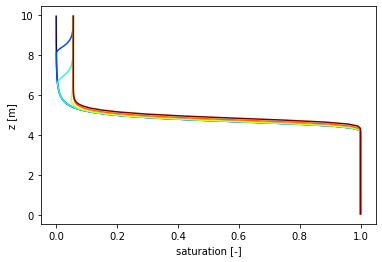

In [21]:
plot("./infiltration_prep_trans.demo", "infiltration example")

### RK - work

In [9]:
# load the ATS solution
directory = "./infiltration_prep_trans.demo"
vis = ats_xdmf.VisFile(directory)
vis.loadMesh(columnar=True)

In [10]:
with h5py.File('infiltration_prep_trans.demo/ats_vis_data.h5','r') as hdf:
    ls = list(hdf.keys())
    print('List of datasets in this file: \n \n', ls)
    print('\n')

List of datasets in this file: 
 
 ['base_porosity.cell.0', 'capillary_pressure_gas_liq.cell.0', 'cell_volume.cell.0', 'darcy_velocity.cell.0', 'darcy_velocity.cell.1', 'darcy_velocity.cell.2', 'mass_density_liquid.cell.0', 'molar_density_liquid.cell.0', 'permeability.cell.0', 'porosity.cell.0', 'pressure.cell.0', 'relative_permeability.cell.0', 'saturation_gas.cell.0', 'saturation_liquid.cell.0', 'viscosity_liquid.cell.0', 'water_content.cell.0']




In [12]:
# The file is always stored as /0 (at initial instance) or /1 (at time instance 1)

# Printing all the quantities at time instance = 0
print('Printing all the quantities at initial instance = 0 \n')
print('Values are assigned for each of the 100 cells \n')
print('U - User, D - Developer \n')

with h5py.File('infiltration_prep_trans.demo/ats_vis_data.h5','r') as hdf:
    ls = list(hdf.keys())
    print('List of datasets in this file: \n \n', ls)
    print('\n')
    
    cell_volume_all_0 = np.array(hdf.get('cell_volume.cell.0/0'))
    cell_volume_0 = np.unique(cell_volume_all_0.flatten())
    print('Cell volume = ', cell_volume_0[0],'m^3 (U)') # Why 0.1 multiple times?
    print('\n')
    
    mass_density_all_0 = np.array(hdf.get('mass_density_liquid.cell.0/0'))
    mass_density_0 = np.unique(mass_density_all_0.flatten())
    print('Mass density [rho_w] = ',mass_density_0, 'kg m^{-3} (D)') # Assigned by developer
    print('\n')
    
    molar_density_all_0 = np.array(hdf.get('molar_density_liquid.cell.0/0'))
    molar_density_0 = np.unique(molar_density_all_0.flatten())
    print('Molar density of water [n_l] = ',molar_density_0, 'mol m^{-3} (D)') # Assigned by developer
    print('\n')
    
    permeability_all_0 = np.array(hdf.get('permeability.cell.0/0'))
    permeability_0 = np.unique(permeability_all_0.flatten())
    print('Absolute permeability [K] = ',permeability_0, ' m^{2} (U)') # Assigned by user
    print('\n')
    
    porosity_all_0 = np.array(hdf.get('porosity.cell.0/0'))
    porosity_0 = np.unique(porosity_all_0.flatten())
    print('Porosity [phi] = ',porosity_0[0], ' [-] (U)') # Assigned by user
    print('\n')
    
    pressure_all_0 = np.array(hdf.get('pressure.cell.0/0'))
    pressure_0 = np.unique(pressure_all_0.flatten())
    print('Absolute pressure [p_abs] = ',pressure_0, ' [Pa] (U)') # Assigned by user
    print('\n')
    
    relative_permeability_all_0 = np.array(hdf.get('relative_permeability.cell.0/0'))
    relative_permeability_0 = np.unique(relative_permeability_all_0.flatten())
    print('Relative permeability (Calculated by upwind with Darcy flux) [kr] = ',relative_permeability_0, ' [-] (U)') # Assigned by user with a method
    print('\n')
    
    saturation_gas_all_0 = np.array(hdf.get('saturation_gas.cell.0/0'))
    saturation_gas_0 = np.unique(saturation_gas_all_0.flatten())
    print('Saturation of gas [s_g] = ',saturation_gas_0, ' [-] (D)') # Assigned by DEVELOPER
    print('\n')
    
    saturation_liquid_all_0 = np.array(hdf.get('saturation_liquid.cell.0/0'))
    saturation_liquid_0 = np.unique(saturation_liquid_all_0.flatten())
    print('Saturation of liquid [s_l] = ',saturation_liquid_0, ' [-] (D)- Fully saturated') # Assigned by DEVELOPER
    print('\n')
    
    temperature_all_0 = np.array(hdf.get('temperature.cell.0/0'))
    temperature_0 = np.unique(temperature_all_0.flatten())
    print('Temperature [T] (at boundary faces and cells?) = ',temperature_0, ' [K] (U)') # Assigned by user
    print('\n')
    
    viscosity_liquid_all_0 = np.array(hdf.get('viscosity_liquid.cell.0/0'))
    viscosity_liquid_0 = np.unique(viscosity_liquid_all_0.flatten())
    print('dynamic_viscosity_liquid [v] = ',viscosity_liquid_0, ' [Pas] (D)') # Assigned by user
    print('\n')
    
    water_content_all_0 = np.array(hdf.get('water_content.cell.0/0'))
    water_content_0 = np.unique(water_content_all_0.flatten())
    print('water_content [theta] = ',water_content_0[0], ' [mol] (U & D)') # Assigned by user through Richards water content
    ### Moles to kg for water
    molar_mass_water = 18.015 # g/mol
    water_mass = 18.015 * 50
    print('\n')
    print('water_content [theta] = ',water_content_0[0]*molar_mass_water/1000, ' [Kg] (U)') 
    print('\n')
#    print('richards_water_content [theta = phi*s*n_l*cellvolume] = ',porosity_0*saturation_liquid_0*molar_density_0*cell_volume_0[0], ' [mol] (U & D)')
 #   water_mass
 #   print('\n')

Printing all the quantities at initial instance = 0 

Values are assigned for each of the 100 cells 

U - User, D - Developer 

List of datasets in this file: 
 
 ['base_porosity.cell.0', 'capillary_pressure_gas_liq.cell.0', 'cell_volume.cell.0', 'darcy_velocity.cell.0', 'darcy_velocity.cell.1', 'darcy_velocity.cell.2', 'mass_density_liquid.cell.0', 'molar_density_liquid.cell.0', 'permeability.cell.0', 'porosity.cell.0', 'pressure.cell.0', 'relative_permeability.cell.0', 'saturation_gas.cell.0', 'saturation_liquid.cell.0', 'viscosity_liquid.cell.0', 'water_content.cell.0']


Cell volume =  0.09999999999999964 m^3 (U)


Mass density [rho_w] =  [1000.] kg m^{-3} (D)


Molar density of water [n_l] =  [55000.] mol m^{-3} (D)


Absolute permeability [K] =  [2.5e-12]  m^{2} (U)


Porosity [phi] =  0.25  [-] (U)


Absolute pressure [p_abs] =  [ 62588.7325  63569.3975  64550.0625  65530.7275  66511.3925  67492.0575
  68472.7225  69453.3875  70434.0525  71414.7175  72395.3825  73376.0475
  7435

In [13]:
def inputfiles_pddataframes(file_name,t):
    """
    The function is defined to read the input files from the ats simulation. 
    For each time instance, a dataframe can store the data.
 
    Parameters
    ------
    
    Input parameters:
    
    file_name : Provide the path to access the file name. 
    Ex: 'richards_steadystate.demo/ats_vis_data.h5'
    
    t : The time instance at which the data is required.
    Ex: cell_volume.cell.0/{t} - here 0/0 - signifies the first directory (with data at t=0), 
    similary 0/1 - signifies the second directory (with data at t=1).
            
    Output parameters:
    
    data_results : pandas dataframe with all the key elements of the simulation.
    
    """
    
    with h5py.File(file_name,'r') as hdf:
        # Cell_volume
        cell_volume_all = np.array(hdf.get(f'cell_volume.cell.0/{t}'))
        cell_volume = cell_volume_all.flatten()

        # Storing the variables/constants in a dataframe - Do we have a direct function to do this? 
        # Can we simplify the code?
        z = np.arange(0.0,10.0,0.1)
        data_results = pd.DataFrame(index=z,data=cell_volume,columns=['cell_volume'])

        mass_density_all = np.array(hdf.get(f'mass_density_liquid.cell.0/{t}'))
        mass_density = mass_density_all.flatten()
        data_results['mass_density [rho_l] [kg m^{-3}]'] = mass_density



        molar_density_all = np.array(hdf.get(f'molar_density_liquid.cell.0/{t}'))
        molar_density = molar_density_all.flatten()
        data_results['molar_density [n_l] [mol m^{-3}]'] = molar_density


        permeability_all = np.array(hdf.get(f'permeability.cell.0/{t}'))
        permeability = permeability_all.flatten()
        data_results['Absolute permeability [K] (m^{2})'] = permeability



        porosity_all = np.array(hdf.get(f'porosity.cell.0/{t}'))
        porosity = porosity_all.flatten()
        data_results['Porosity [phi] (-)'] = porosity

        pressure_all = np.array(hdf.get(f'pressure.cell.0/{t}'))
        pressure = pressure_all.flatten()
        data_results['Abs pressure [p_abs] [Pa]'] = pressure 
        # Water pressure or total pressure (Atm + water)? - Probably both

        relative_permeability_all = np.array(hdf.get(f'relative_permeability.cell.0/{t}'))
        relative_permeability = relative_permeability_all.flatten()
        data_results['Relative permeability [kr] [-]'] = relative_permeability


        saturation_gas_all = np.array(hdf.get(f'saturation_gas.cell.0/{t}'))
        saturation_gas = saturation_gas_all.flatten()
        data_results['Saturation of gas [s_g] [-]'] = saturation_gas


        saturation_liquid_all = np.array(hdf.get(f'saturation_liquid.cell.0/{t}'))
        saturation_liquid = saturation_liquid_all.flatten()
        data_results['Saturation of liquid [s_l] [-]'] = saturation_liquid


        #temperature_all = np.array(hdf.get(f'temperature.cell.0/{t}'))
        #temperature = temperature_all.flatten()
        #data_results['Temperature [T] [K]'] = temperature


        viscosity_liquid_all = np.array(hdf.get(f'viscosity_liquid.cell.0/{t}'))
        viscosity_liquid = viscosity_liquid_all.flatten()
        data_results['viscosity_liquid [v] Pas]'] = viscosity_liquid


        water_content_all = np.array(hdf.get(f'water_content.cell.0/{t}'))
        water_content = water_content_all.flatten()
        data_results['water_content [theta] mols'] = water_content
        
        return data_results

In [14]:
data_results_0 = inputfiles_pddataframes(file_name='infiltration_prep_trans.demo/ats_vis_data.h5',t=0)
data_results_0

,cell_volume,mass_density [rho_l] [kg m^{-3}],molar_density [n_l] [mol m^{-3}],Absolute permeability [K] (m^{2}),Porosity [phi] (-),Abs pressure [p_abs] [Pa],Relative permeability [kr] [-],Saturation of gas [s_g] [-],Saturation of liquid [s_l] [-],viscosity_liquid [v] Pas],water_content [theta] mols
0.0,0.1,1000.0,55000.0,2.500000e-12,0.250058,159674.5675,6.179775e+00,0.000000,1.000000,0.00089,1375.318173
0.1,0.1,1000.0,55000.0,2.500000e-12,0.250057,158693.9025,6.179775e+00,0.000000,1.000000,0.00089,1375.312779
0.2,0.1,1000.0,55000.0,2.500000e-12,0.250056,157713.2375,6.179775e+00,0.000000,1.000000,0.00089,1375.307385
0.3,0.1,1000.0,55000.0,2.500000e-12,0.250055,156732.5725,6.179775e+00,0.000000,1.000000,0.00089,1375.301992
0.4,0.1,1000.0,55000.0,2.500000e-12,0.250054,155751.9075,6.179775e+00,0.000000,1.000000,0.00089,1375.296598
...,...,...,...,...,...,...,...,...,...,...,...
9.5,0.1,1000.0,55000.0,2.500000e-12,0.250000,66511.3925,9.612209e-09,0.998656,0.001344,0.00089,1.848639
9.6,0.1,1000.0,55000.0,2.500000e-12,0.250000,65530.7275,6.887807e-09,0.998797,0.001203,0.00089,1.654267
9.7,0.1,1000.0,55000.0,2.500000e-12,0.250000,64550.0625,4.980205e-09,0.998920,0.001080,0.00089,1.484779
9.8,0.1,1000.0,55000.0,2.500000e-12,0.250000,63569.3975,3.631756e-09,0.999028,0.000972,0.00089,1.336449


In [15]:
t = 0
with h5py.File('infiltration_prep_trans.demo/ats_vis_data.h5','r') as hdf:
    ls = list(hdf.keys())
    print('List of datasets in this file: \n \n', ls)
    print('\n')
    
    # Cell_volume
    cell_volume_all = np.array(hdf.get(f'cell_volume.cell.0/{t}'))
    cell_volume = cell_volume_all.flatten()
    print(cell_volume)

List of datasets in this file: 
 
 ['base_porosity.cell.0', 'capillary_pressure_gas_liq.cell.0', 'cell_volume.cell.0', 'darcy_velocity.cell.0', 'darcy_velocity.cell.1', 'darcy_velocity.cell.2', 'mass_density_liquid.cell.0', 'molar_density_liquid.cell.0', 'permeability.cell.0', 'porosity.cell.0', 'pressure.cell.0', 'relative_permeability.cell.0', 'saturation_gas.cell.0', 'saturation_liquid.cell.0', 'viscosity_liquid.cell.0', 'water_content.cell.0']


[0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1
 0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1
 0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1
 0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1
 0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1
 0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1]


In [16]:
# The file is always stored as /0 (at initial instance) or /1 (at time instance 1)

# Printing all the quantities at time instance = 0
print('Storing all the quantities at initial instance = 1 \n')
print('Values are assigned for each of the 100 cells \n')
print('U - User, D - Developer \n')

with h5py.File('infiltration_prep_trans.demo/ats_vis_data.h5','r') as hdf:
    ls = list(hdf.keys())
    print('List of datasets in this file: \n \n', ls)
    print('\n')
    
    # Cell_volume
    cell_volume_all = np.array(hdf.get('cell_volume.cell.0/0'))
    cell_volume = cell_volume_all.flatten()
    
    # Storing the variables/constants in a dataframe - Do we have a direct function to do this? 
    # Can we simplify the code?
    z = np.arange(0.0,10.0,0.1)
    data_results_0 = pd.DataFrame(index=z,data=cell_volume,columns=['cell_volume'])

    mass_density_all = np.array(hdf.get('mass_density_liquid.cell.0/0'))
    mass_density = mass_density_all.flatten()
    data_results_0['mass_density [rho_l] [kg m^{-3}]'] = mass_density


    
    molar_density_all = np.array(hdf.get('molar_density_liquid.cell.0/0'))
    molar_density = molar_density_all.flatten()
    data_results_0['molar_density [n_l] [mol m^{-3}]'] = molar_density

    
    permeability_all = np.array(hdf.get('permeability.cell.0/0'))
    permeability = permeability_all.flatten()
    data_results_0['Absolute permeability [K] (m^{2})'] = permeability

    
    
    porosity_all = np.array(hdf.get('porosity.cell.0/0'))
    porosity = porosity_all.flatten()
    data_results_0['Porosity [phi] (-)'] = porosity

    pressure_all = np.array(hdf.get('pressure.cell.0/0'))
    pressure = pressure_all.flatten()
    data_results_0['Abs pressure [p_abs] [Pa]'] = pressure 
    # Water pressure or total pressure (Atm + water)? - Probably both
    
    relative_permeability_all = np.array(hdf.get('relative_permeability.cell.0/0'))
    relative_permeability = relative_permeability_all.flatten()
    data_results_0['Relative permeability [kr] [-]'] = relative_permeability

    
    saturation_gas_all = np.array(hdf.get('saturation_gas.cell.0/0'))
    saturation_gas = saturation_gas_all.flatten()
    data_results_0['Saturation of gas [s_g] [-]'] = saturation_gas

    
    saturation_liquid_all = np.array(hdf.get('saturation_liquid.cell.0/0'))
    saturation_liquid = saturation_liquid_all.flatten()
    data_results_0['Saturation of liquid [s_l] [-]'] = saturation_liquid

    
    temperature_all = np.array(hdf.get('temperature.cell.0/0'))
    temperature = temperature_all.flatten()
    data_results_0['Temperature [T] [K]'] = temperature

    
    viscosity_liquid_all = np.array(hdf.get('viscosity_liquid.cell.0/0'))
    viscosity_liquid = viscosity_liquid_all.flatten()
    data_results_0['viscosity_liquid [v] Pas]'] = viscosity_liquid

    
    water_content_all = np.array(hdf.get('water_content.cell.0/0'))
    water_content = water_content_all.flatten()
    data_results_0['water_content [theta] mols'] = water_content

data_results_0
    

Storing all the quantities at initial instance = 1 

Values are assigned for each of the 100 cells 

U - User, D - Developer 

List of datasets in this file: 
 
 ['base_porosity.cell.0', 'capillary_pressure_gas_liq.cell.0', 'cell_volume.cell.0', 'darcy_velocity.cell.0', 'darcy_velocity.cell.1', 'darcy_velocity.cell.2', 'mass_density_liquid.cell.0', 'molar_density_liquid.cell.0', 'permeability.cell.0', 'porosity.cell.0', 'pressure.cell.0', 'relative_permeability.cell.0', 'saturation_gas.cell.0', 'saturation_liquid.cell.0', 'viscosity_liquid.cell.0', 'water_content.cell.0']




ValueError: Length of values (1) does not match length of index (100)